In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 

In [2]:
dataframe = pd.read_csv("master.csv")

In [3]:
dataframe.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Structure of the data
https://www.kaggle.com/prakashpcssinha/suicide-analysis-by-random-forest

### Structure 

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
gdp_for_year ($)      27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


- Dropping redundant coloumns
- Renaming with proper convention of coloumn names
- Normalizing the data

In [5]:
dataframe.drop(['country-year','suicides/100k pop'],axis =1,inplace = True )
dataframe.rename(columns={"gdp_for_year ($) ":"gdp_for_year_usd","gdp_per_capita ($)":"gdp_per_capita_usd"},inplace=True)
dataframe["gdp_for_year_usd"] = dataframe["gdp_for_year_usd"].str.replace(',','').astype('int64')

## Missing values

### Percentage of null values in column

In [6]:
round(dataframe.isnull().sum()/len(dataframe),3)

country               0.000
year                  0.000
sex                   0.000
age                   0.000
suicides_no           0.000
population            0.000
HDI for year          0.699
gdp_for_year_usd      0.000
gdp_per_capita_usd    0.000
generation            0.000
dtype: float64

### Treated by dropping the coloumn due to 69% of missing values

In [7]:
dataframe.drop(['HDI for year'],axis = 1,inplace=True)

## Outlier Detection
https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

Text(0.5, 1.0, 'After Log Transfromation')

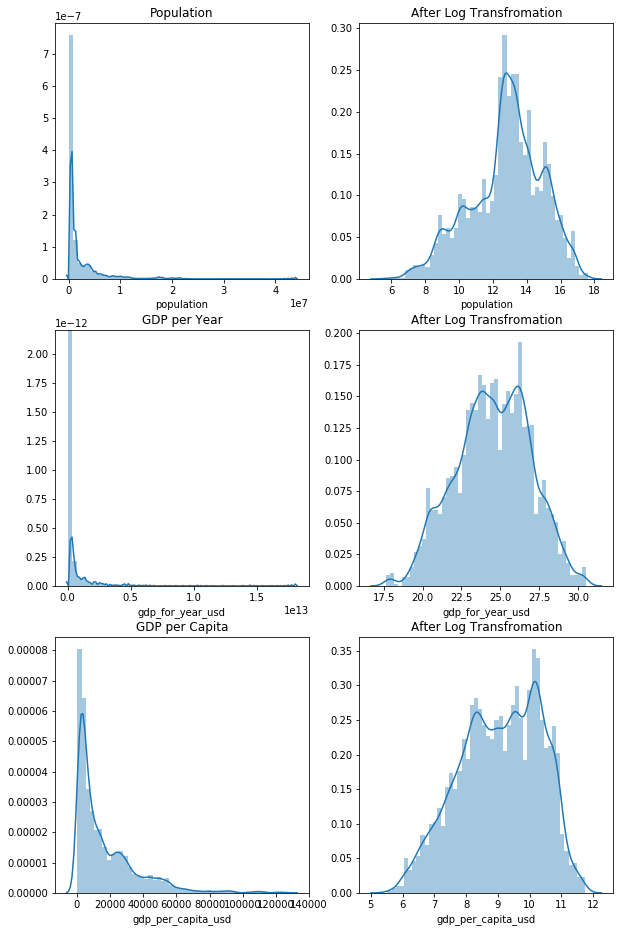

In [8]:
fig, axes = plt.subplots(3,2)
fig.set_size_inches(10,16)
sns.distplot(dataframe['population'],ax = axes[0,0]).set_title("Population")
sns.distplot(np.log(dataframe['population']),ax = axes[0,1]).set_title("After Log Transfromation")
sns.distplot(dataframe['gdp_for_year_usd'],ax = axes[1,0]).set_title("GDP per Year")
sns.distplot(np.log(dataframe['gdp_for_year_usd']),ax = axes[1,1]).set_title("After Log Transfromation")
sns.distplot(dataframe['gdp_per_capita_usd'],ax = axes[2,0]).set_title("GDP per Capita")
sns.distplot(np.log(dataframe['gdp_per_capita_usd']),ax = axes[2,1]).set_title("After Log Transfromation")

### EDA

##### Categorical features
- Country: A total of 101 countries are included in this dataset. Most countries in Asia are not included and considering we have 195 countries in the world today, this is a quite biased data for worldwide analysis.
- Year: The dataset goes from 1985 to 2016
- Sex: Male/female differentiation
- Age: Age is divided in five age intervals.
- Generation: There are six generations included in this dataset. See 3.6 for details.

##### Numerical Features
- Population size: Number of people contained in each subsample
- Number of Suicides: Number of suicides in each subsample
- GDP for year: Gross Domestic Product, a measure of the market value for a country-year combination.
- GDP per capita: Obtained by dividing the GDP by the total population of the country for that year.

In [9]:
dataframe.head(5)

,country,year,sex,age,suicides_no,population,gdp_for_year_usd,gdp_per_capita_usd,generation
0,Albania,1987,male,15-24 years,21,312900,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,2156624900,796,Boomers


### Univariate Analysis

### Categorical Variables


- We can see that the data from 2016 only has 16 countries and actually does not include an age group (4~15 years). 
- We just have to be sure we dont use these data to mess with the rest of the analysis.

In [10]:
agg_dict = {'country':'nunique','age':'nunique'}
dataframe.groupby('year').agg(agg_dict).sort_values('country',ascending = 'False').head(2)

,country,age
year,,
2016,16,5
1985,48,6


In [11]:
newdataframe = dataframe.query('year != 2016')

### Year 2016 has been dropped due to less countires,further analysis will be only till 2015

- We have equal amount of suicide information on both genders and between all age groupls (equal instances)
- We have less information about suicide numbers on few generations as no of instances vary

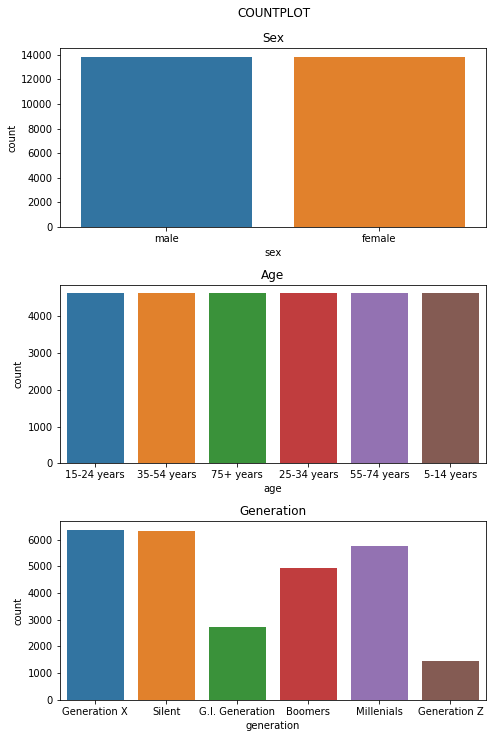

In [46]:
fig, axes = plt.subplots(3,1)
fig.set_size_inches(7,10)
fig.suptitle("COUNTPLOT",y=1.02,x = 0.55)
sns.countplot(x='sex',data=newdataframe,ax=axes[0]).set_title("Sex")
sns.countplot(x='age',data=newdataframe,ax = axes[1]).set_title("Age")
sns.countplot(x='generation',data=newdataframe,ax = axes[2]).set_title("Generation")
plt.tight_layout()
# fig.delaxes(ax= axes[2,1]) 

### Table

We observe that 
- Total 10 unique countries are present in dataset
- Suicide rates of males are higher than females
- The age feature has 6 unique age groups
- The generation feature has 6 types of generation
- Generation X has higher rates of suicide

In [13]:
newdataframe.describe(include=['O'])

,country,sex,age,generation
count,27660,27660,27660,27660
unique,100,2,6,6
top,Spain,male,5-14 years,Generation X
freq,372,13830,4610,6376


### Numeric Data (Univariate)

In [14]:
newdataframe[['suicides_no','population','gdp_for_year_usd','gdp_per_capita_usd']].describe()

,suicides_no,population,gdp_for_year_usd,gdp_per_capita_usd
count,27660.000000,2.766000e+04,2.766000e+04,27660.000000
mean,243.413485,1.850689e+06,4.471009e+11,16815.568330
std,904.490185,3.920658e+06,1.457574e+12,18861.585497
min,0.000000,2.780000e+02,4.691962e+07,251.000000
25%,3.000000,9.753525e+04,8.976208e+09,3436.000000
50%,25.000000,4.307250e+05,4.801361e+10,9283.000000
75%,132.000000,1.491041e+06,2.602024e+11,24796.000000
max,22338.000000,4.380521e+07,1.812071e+13,126352.000000


In [15]:
newdataframe.head(1)

,country,year,sex,age,suicides_no,population,gdp_for_year_usd,gdp_per_capita_usd,generation
0,Albania,1987,male,15-24 years,21,312900,2156624900,796,Generation X


### Bivariate /Multivariate analysis

### Categorical data

We observe here that -

- Suicide rate is high in age group 35-54 years
- Suicide rate is low in age group 5-14 years

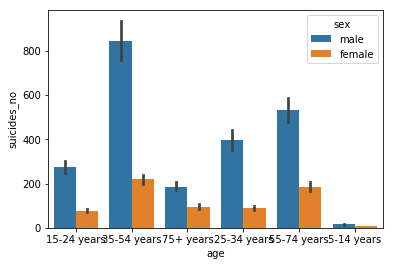

In [16]:
sns.barplot(x='age',y='suicides_no',hue='sex',data=newdataframe)

- Suicide rates are higher in Russian Federation, United States and Japan
- Suicide rates are too low in many countries.
- Suicide rates are moderate in France, Ukraine, Germany, Brazil, Republic of Korea, Poland, Thailand, United Kingdom, Canada, Italy, Mexico, etc.

Text(0.5, 1.0, 'Countries with suicide numbers')

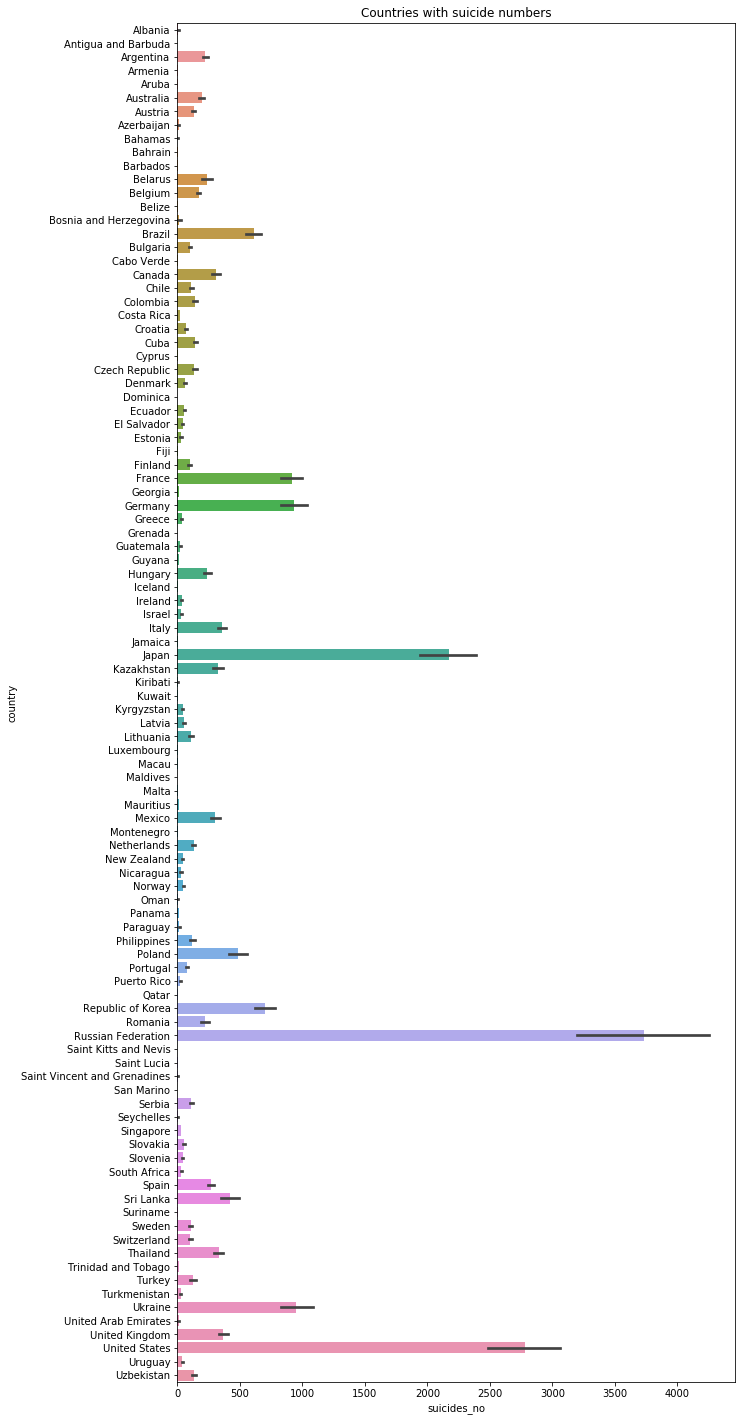

In [17]:
plt.figure(figsize=(10,25))
sns.barplot(newdataframe['suicides_no'],newdataframe['country'],orient='h')
plt.title("Countries with suicide numbers")

Top 15 countries with least suicides
- The suicide count in countries Dominica and Saint Kitts and Nevis is zero.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

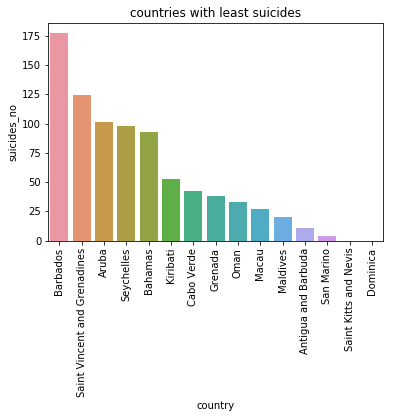

In [68]:
country_suicides = newdataframe[['country','suicides_no']].groupby(['country']).sum()
country_suicides = country_suicides.reset_index().sort_values(by = 'suicides_no',ascending = False)
sns.barplot(x='country', y='suicides_no',data=country_suicides[-15:]).set_title('countries with least suicides')
plt.xticks(rotation=90)

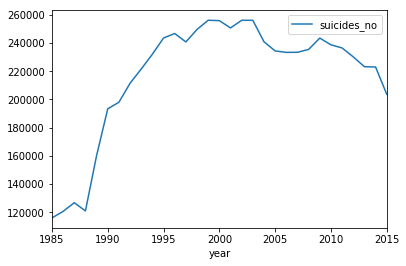

In [69]:
newdataframe[['year','suicides_no']].groupby(['year']).sum().plot()


- The Greatest Generation: Born between 1901 - 1924, they are those who experienced the Great Depression and World War II in their adulthood.
- The Silent Generation: Born in between 1924 - 1945, coming of age during the postwar happiness.The Silent Generation children grew up in conditions complicated by war and economic downturn.
- Baby Boomers: Those born in the years after World War II. These are the men and women who tuned in, got high, dropped out, dodged the draft, swung in the Sixties and became hippies in the Seventies. The first tolerant generation. Envision technology and innovation as requiring a learning process.
- Generation X: Born between 1965 and 1980, they are the “latch-key kids” who grew up street-smart but isolated, often with divorced or career-driven parents.
- Millennials: Researchers and commentators use birth years ranging from the early 1980s to the early 2000s. Known as sophisticated, technology wise, immune to most traditional marketing and sales pitches, they’ve seen it all and been exposed to it all since early childhood.
- Generation Z: It is the generation born after 1995 and they have never known a world without computers and cell phones.

Text(0.5, 1.0, 'Suicides vs generations per year')

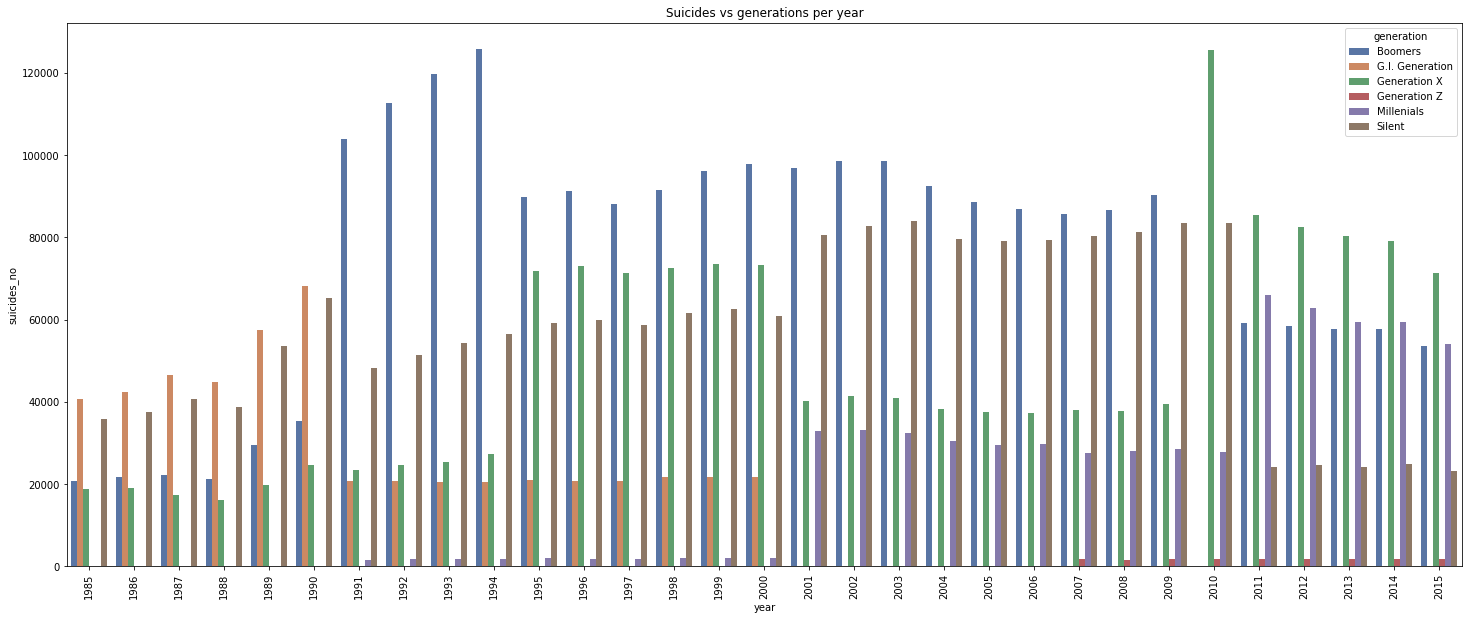

In [72]:
gen_year = newdataframe[['suicides_no','generation','year']].groupby(['generation','year']).sum().reset_index()
plt.figure(figsize=(25,10))
# sns.set(font_scale=1.5)
plt.xticks(rotation=90)
sns.barplot(y='suicides_no', x='year', hue='generation', data=gen_year, palette='deep').set_title('Suicides vs generations per year')

In [80]:
newdataframe.head(2)

,country,year,sex,age,suicides_no,population,gdp_for_year_usd,gdp_per_capita_usd,generation
0,Albania,1987,male,15-24 years,21,312900,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,2156624900,796,Silent


## Multivariate Analysis Numeric data

In [1]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(newdataframe.corr(), annot=True)

NameError: name 'plt' is not defined

It can be observed from the heat map figure
- Population and gdp_for_year are correlated
- Population and suicides_no is also correlated

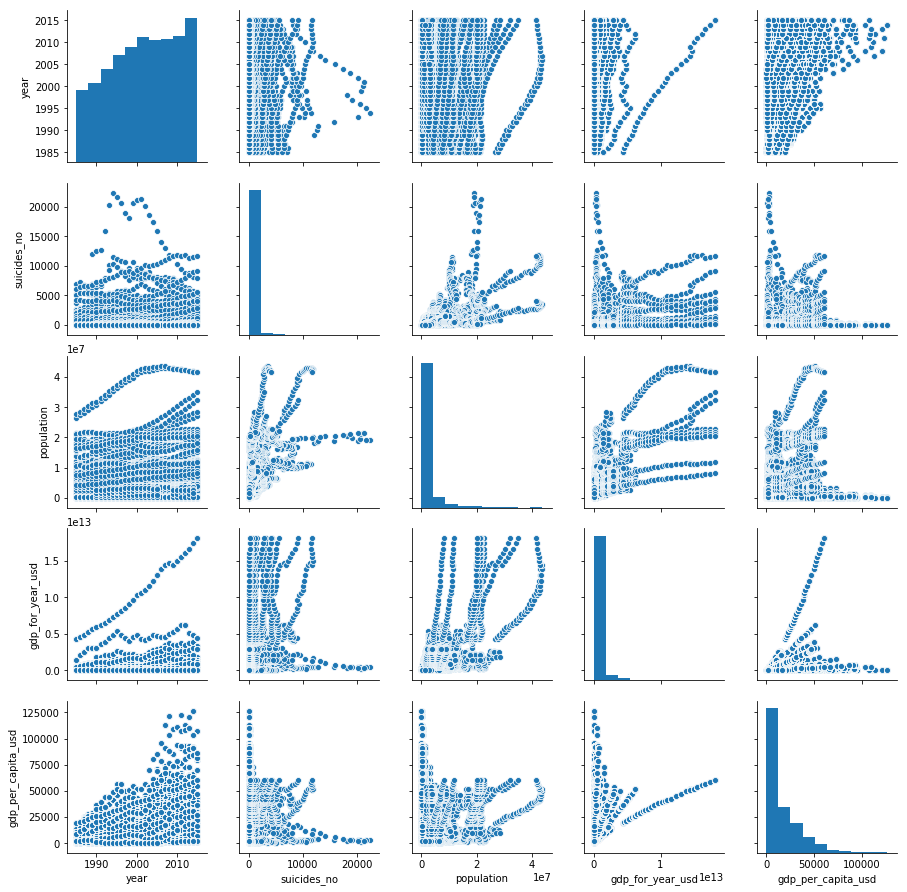

In [79]:
sns.pairplot(newdataframe)

https://www.kaggle.com/prakashpcssinha/suicide-analysis-by-random-forest